# Imports

In [1]:
import tensorflow as tf

import os
import math
import random
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
import logging
import warnings

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

warnings.simplefilter('ignore')

In [3]:
print(tf.__version__)

1.15.3


In [4]:
random.seed(42)

# Hyperparameters

In [5]:
epochs = 1000
batch_size = 8
verbose = 1

# Split Data

In [6]:
base_dir = '/home/naivoder/hd/ml/datasets/big_cats/'
images_dir = os.path.join(base_dir, 'images')

tiger_dir = os.path.join(images_dir, 'Tiger')
lion_dir = os.path.join(images_dir, 'Lion')
leopard_dir = os.path.join(images_dir, 'Leopard')
cheetah_dir = os.path.join(images_dir, 'Cheetah')

print(len(os.listdir(tiger_dir)))
print(len(os.listdir(lion_dir)))
print(len(os.listdir(leopard_dir)))
print(len(os.listdir(cheetah_dir)))

1039
1190
694
568


In [7]:
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

train_tiger_dir = '/home/naivoder/hd/ml/datasets/big_cats/train/Tiger/'
validate_tiger_dir = '/home/naivoder/hd/ml/datasets/big_cats/validate/Tiger/'
test_tiger_dir = '/home/naivoder/hd/ml/datasets/big_cats/test/Tiger/'

train_lion_dir = '/home/naivoder/hd/ml/datasets/big_cats/train/Lion/'
validate_lion_dir = '/home/naivoder/hd/ml/datasets/big_cats/validate/Lion/'
test_lion_dir = '/home/naivoder/hd/ml/datasets/big_cats/test/Lion/'

train_leopard_dir = '/home/naivoder/hd/ml/datasets/big_cats/train/Leopard/'
validate_leopard_dir = '/home/naivoder/hd/ml/datasets/big_cats/validate/Leopard/'
test_leopard_dir = '/home/naivoder/hd/ml/datasets/big_cats/test/Leopard/'

train_cheetah_dir = '/home/naivoder/hd/ml/datasets/big_cats/train/Cheetah/'
validate_cheetah_dir = '/home/naivoder/hd/ml/datasets/big_cats/validate/Cheetah/'
test_cheetah_dir = '/home/naivoder/hd/ml/datasets/big_cats/test/Cheetah/'

try:
    os.makedirs(train_tiger_dir)
    os.makedirs(train_lion_dir)
    os.makedirs(train_leopard_dir)
    os.makedirs(train_cheetah_dir)
except OSError:
    pass

try:
    os.makedirs(test_tiger_dir)
    os.makedirs(test_lion_dir)
    os.makedirs(test_leopard_dir)
    os.makedirs(test_cheetah_dir)
except OSError:
    pass

try:
    os.makedirs(validate_tiger_dir)
    os.makedirs(validate_lion_dir)
    os.makedirs(validate_leopard_dir)
    os.makedirs(validate_cheetah_dir)
except OSError:
    pass

In [8]:
def split_data(src, train_path, valid_path, test_path):
    images = random.sample(os.listdir(src), len(os.listdir(src)))
    train_imgs = [img for img in images[:math.floor(len(images)*0.6)]]
    valid_imgs = [img for img in images[math.floor(len(images)*0.6):math.floor(len(images)*0.8)]]
    test_imgs = [img for img in images[math.floor(len(images)*0.8):]]
    for img in train_imgs:
        image_path = os.path.join(src, img)
        destination = os.path.join(train_path, img)
        if os.path.getsize(image_path) > 0:
            copyfile(image_path, destination)
    for img in valid_imgs:
        image_path = os.path.join(src, img)
        destination = os.path.join(valid_path, img)
        if os.path.getsize(image_path) > 0:
            copyfile(image_path, destination)
    for img in test_imgs:
        image_path = os.path.join(src, img)
        destination = os.path.join(test_path, img)
        if os.path.getsize(image_path) > 0:
            copyfile(image_path, destination)

In [9]:
print(tiger_dir)
print(train_tiger_dir)
print(validate_tiger_dir)
print(test_tiger_dir)

/home/naivoder/hd/ml/datasets/big_cats/images/Tiger
/home/naivoder/hd/ml/datasets/big_cats/train/Tiger/
/home/naivoder/hd/ml/datasets/big_cats/validate/Tiger/
/home/naivoder/hd/ml/datasets/big_cats/test/Tiger/


In [10]:
split_data(tiger_dir, train_tiger_dir, validate_tiger_dir, test_tiger_dir)
split_data(lion_dir, train_lion_dir, validate_lion_dir, test_lion_dir)
split_data(leopard_dir, train_leopard_dir, validate_leopard_dir, test_leopard_dir)
split_data(cheetah_dir, train_cheetah_dir, validate_cheetah_dir, test_cheetah_dir)

In [11]:
classes = ['Tiger', 'Lion', 'Leopard', 'Cheetah']

for name in classes:
    print('%s training images: %s' % (name, len(os.listdir(os.path.join(train_dir, name)))))
    print('%s validation images: %s' % (name, len(os.listdir(os.path.join(valid_dir, name)))))
    print('%s testing images: %s' % (name, len(os.listdir(os.path.join(test_dir, name)))))
    print('\n')

num_train = sum(len(files) for _, _, files in os.walk(train_dir))
num_valid = sum(len(files) for _, _, files in os.walk(valid_dir))
num_test = sum(len(files) for _, _, files in os.walk(test_dir))

print('Training images:', num_train)
print('Validation images:', num_valid)
print('Testing images:', num_test)

Tiger training images: 623
Tiger validation images: 208
Tiger testing images: 208


Lion training images: 714
Lion validation images: 238
Lion testing images: 238


Leopard training images: 416
Leopard validation images: 139
Leopard testing images: 139


Cheetah training images: 340
Cheetah validation images: 114
Cheetah testing images: 114


Training images: 2093
Validation images: 699
Testing images: 699


# Build Generators

In [29]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
train_batches = train_datagen.flow_from_directory(train_dir, 
                                                  batch_size=batch_size, 
                                                  class_mode='sparse',
                                                  target_size=(500, 500),
                                                  shuffle=True)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_batches = valid_datagen.flow_from_directory(valid_dir,
                                                  batch_size=batch_size,
                                                  class_mode='sparse',
                                                  target_size=(500, 500))

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_batches = test_datagen.flow_from_directory(test_dir,
                                                batch_size=batch_size,
                                                class_mode='sparse',
                                                target_size=(500,500))

Found 2093 images belonging to 4 classes.
Found 699 images belonging to 4 classes.
Found 699 images belonging to 4 classes.


In [30]:
def plot_image(img):
    fig, axes = plt.subplots(figsize=(2,2))
    axes.imshow(img)
    plt.tight_layout()
    plt.show()

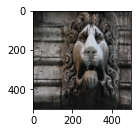

2.0


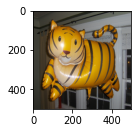

3.0


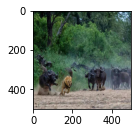

2.0


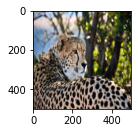

0.0


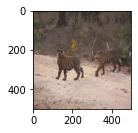

3.0


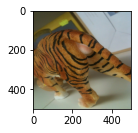

3.0


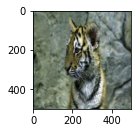

3.0


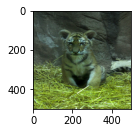

3.0


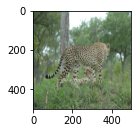

0.0


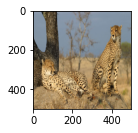

1.0


In [31]:
for i in range(10):
    plot_image(train_batches[i][0][0])
    print(train_batches[i][1][0])

# Define Model

In [32]:
inputs = tf.keras.Input(shape=(500, 500, 3), name="img")

second_input = tf.keras.layers.MaxPooling2D(4)(inputs)
third_input = tf.keras.layers.MaxPooling2D(16)(inputs)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(inputs)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 64))(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

out_1 = tf.keras.layers.MaxPooling2D(4)(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(out_1)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(32, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 32))(x)
x = tf.keras.layers.Dense(2, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 64))(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

out_2 = tf.keras.layers.Concatenate(axis=-1)([x, out_1, second_input])

x = tf.keras.layers.Conv2D(256, 3, padding='same')(out_2)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 256))(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(256, 3, padding='same')(out_2)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 256))(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(128, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 128))(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(128, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 128))(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 64))(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(64, 3, padding='same')(x)
hold = x
x = tf.keras.layers.GlobalAveragePooling2D()(hold)
x = tf.keras.layers.Reshape((1, 1, 64))(x)
x = tf.keras.layers.Dense(4, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='sigmoid')(x)
x = tf.keras.layers.multiply([hold, x])
x = tf.keras.layers.ReLU()(x)

out_3 = tf.keras.layers.Concatenate(axis=-1)([x, out_2])

x = tf.keras.layers.MaxPooling2D(4)(out_3)

out_4 = tf.keras.layers.Concatenate(axis=-1)([x, third_input])

x = tf.keras.layers.MaxPooling2D(4)(out_4)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1028, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name="big_cat_skipnet")
model.summary()

Model: "big_cat_skipnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 500, 500, 32) 896         img[0][0]                        
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 32)           0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
reshape (Reshape)               (None, 1, 1, 32)     0           global_average_pooling2d[0][0]   
____________________________________________________________________________________

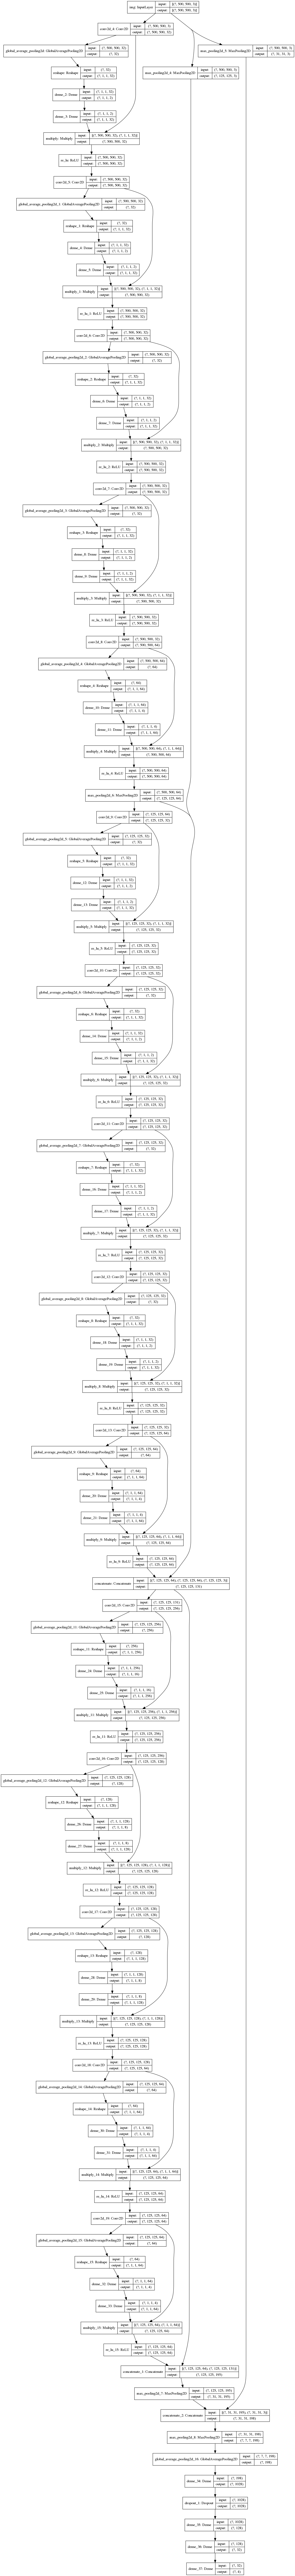

In [33]:
tf.keras.utils.plot_model(model, 'big_cat_skipnet.png', show_shapes=True)

In [34]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('big_cats_weights.h5', 
                                                      save_best_only=True, 
                                                      save_weights_only=True)

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [35]:
train_steps = num_train // batch_size
valid_steps = num_valid // batch_size

print(train_steps, valid_steps)

261 87


In [ ]:
history = model.fit(train_batches,
                    epochs=epochs,
                    steps_per_epoch=train_steps,
                    validation_data=valid_batches,
                    validation_steps=valid_steps,
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=verbose)

Epoch 1/1000
261/261 [==============================] - 121s 464ms/step - loss: 1.3535 - acc: 0.3165 - val_loss: 1.3474 - val_acc: 0.3420
Epoch 2/1000
261/261 [==============================] - 107s 411ms/step - loss: 1.3497 - acc: 0.3271 - val_loss: 1.3468 - val_acc: 0.3420
Epoch 3/1000
261/261 [==============================] - 107s 411ms/step - loss: 1.3500 - acc: 0.3314 - val_loss: 1.3460 - val_acc: 0.3420
Epoch 4/1000
 64/261 [======>.......................] - ETA: 1:13 - loss: 1.3464 - acc: 0.3535

In [ ]:
plt.style.use('fivethirtyeight')

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(acc, label='Training Accuracy')
axs[0].plot(val_acc, label='Validation Accuracy')
axs[0].set_title('Training vs. Validation Accuracy')

axs[1].plot(loss, label='Training Loss')
axs[1].plot(val_loss, label='Validation Loss')
axs[1].yaxis.tick_right()
axs[1].set_title('Training vs. Validation Loss')

fig.tight_layout()

# Load and Evaluate Model

In [ ]:
model.load_weights("big_cats_weights.h5")

In [ ]:
results = model.evaluate(test_batch, steps=num_test//64)
dict(zip(model.metrics_names, results))